# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
output_data_file = "output_data/cities.csv"

C:\Users\blake.singewald\AppData\Local\Temp\ipykernel_16832\1536680146.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | avanigadda
Processing Record 4 of Set 1 | anibare
City not found. Skipping...
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bulgan
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | whakatane
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | prince rupert
Processing Record 13 of Set 1 | tsawwassen
Processing Record 14 of Set 1 | la serena
Processing Record 15 of Set 1 | berezovyy
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | porto novo
Processing Record 18 of Set 1 | ad douiem
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | barra do corda
Processing Record 21 of Set 1 | hermanus


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count

city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,88.21,22,0,13.80,AU,1706826649
1,waitangi,-43.9535,-176.5597,64.81,93,99,1.01,NZ,1706826839
2,avanigadda,16.0215,80.9181,71.60,92,92,3.94,IN,1706826840
3,wailua homesteads,22.0669,-159.3780,77.43,75,20,6.91,US,1706826840
4,adamstown,-25.0660,-130.1015,76.69,88,42,20.20,PN,1706826840


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,88.21,22,0,13.80,AU,1706826649
1,waitangi,-43.9535,-176.5597,64.81,93,99,1.01,NZ,1706826839
2,avanigadda,16.0215,80.9181,71.60,92,92,3.94,IN,1706826840
3,wailua homesteads,22.0669,-159.3780,77.43,75,20,6.91,US,1706826840
4,adamstown,-25.0660,-130.1015,76.69,88,42,20.20,PN,1706826840


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

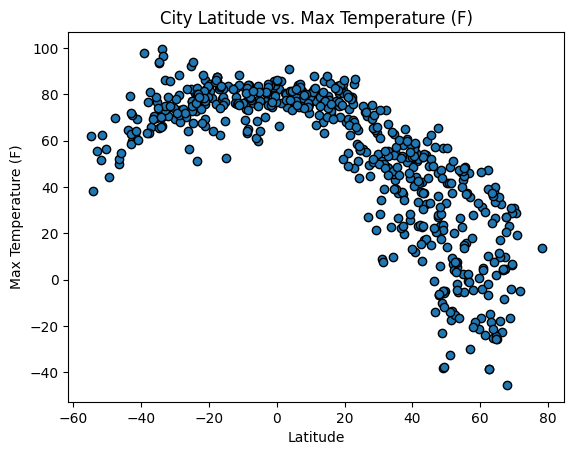

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

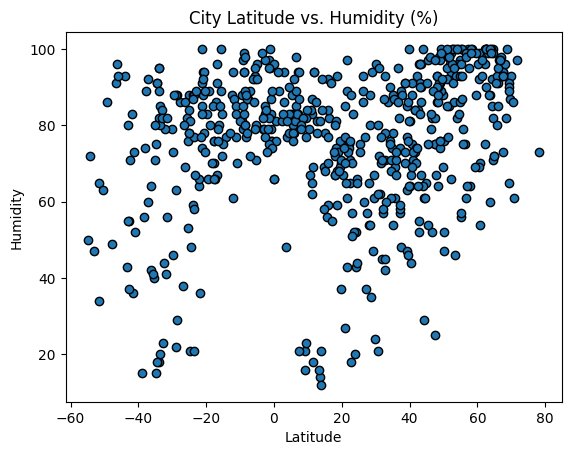

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

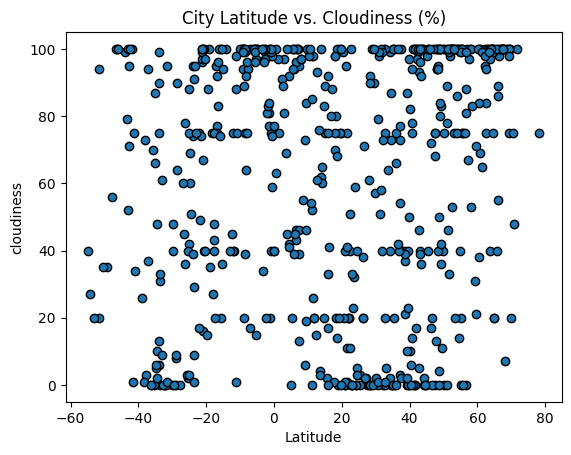

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

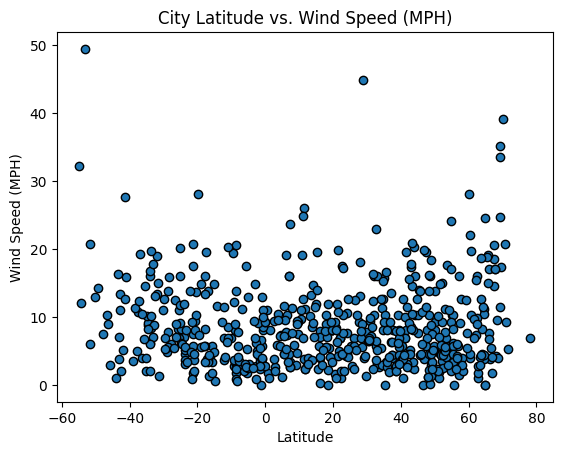

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_title, y_title, vertical_alignment:str, horizontal_allignment:str):

    # Define regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    
    regress_values = x_values * slope + intercept
    
    liner_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    
    # Define the elements needed to Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    
    #Alligns the text values according to the function call
    if horizontal_allignment.lower() == "right":

        #alligns text to be on right or left side of plot area as defined
        x_values_alligned = x_values.max()

        #alligns horizontal postion of text to stay within the plot
        h_alignment_alligned = "right" 

    elif horizontal_allignment.lower() == "left":
        x_values_alligned = x_values.min()
        h_alignment_alligned = "left"    

    else:
        #defaults text the center, center for all other choices
        x_values_alligned = x_values.median()
        h_alignment_alligned = "center"


    #Alligns the text values according to the function call
    if vertical_alignment.lower() == "top":

        #alligns text to be on top or bottom in the plot area as defined
        y_values_alligned = y_values.max()

    elif vertical_alignment.lower() == "bottom":
        y_values_alligned = y_values.min()

    else:
        #defaults to the center for all other choices
        y_values_alligned = y_values.median()    


    plt.text(
            x_values_alligned,      #x-axis posistion
            y_values_alligned,      #y-axis positiion
            liner_eq,               #text to be displayed
            fontsize = 11,          
            color = "black",          
            fontweight = "bold",
            horizontalalignment = h_alignment_alligned 
            )
    
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(x_title + " vs " + y_title)
    print(f"The r-squared is: {str(round(rvalue, 5))}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avanigadda,16.0215,80.9181,71.60,92,92,3.94,IN,1706826840
3,wailua homesteads,22.0669,-159.3780,77.43,75,20,6.91,US,1706826840
5,bulgan,48.8125,103.5347,-9.98,89,4,3.56,MN,1706826840
8,longyearbyen,78.2186,15.6401,13.84,73,75,6.91,SJ,1706826841
9,susuman,62.7833,148.1667,-15.02,100,100,1.01,RU,1706826797


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,88.21,22,0,13.80,AU,1706826649
1,waitangi,-43.9535,-176.5597,64.81,93,99,1.01,NZ,1706826839
4,adamstown,-25.0660,-130.1015,76.69,88,42,20.20,PN,1706826840
6,port-aux-francais,-49.3500,70.2167,44.47,86,35,14.25,TF,1706826840
7,whakatane,-37.9585,176.9854,76.51,74,73,5.01,NZ,1706826841


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.81135


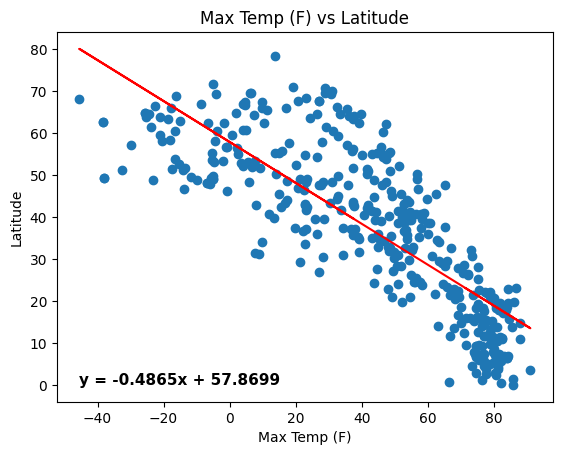

In [15]:
# Linear regression on Northern Hemisphere
x_input = northern_hemi_df["Max Temp"]
y_input = northern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Max Temp (F)", "Latitude", "BoTTOm", "LefT")

The r-squared is: 0.43419


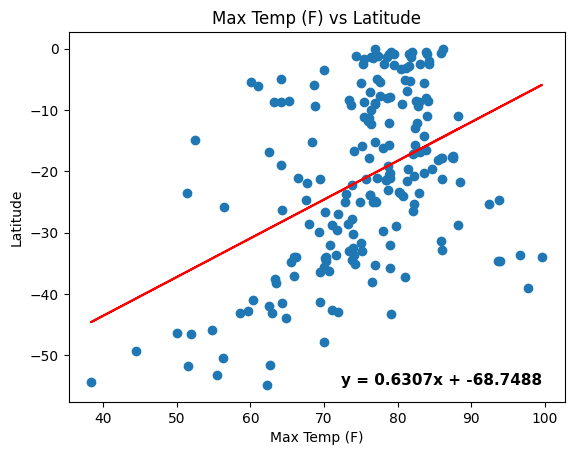

In [16]:
# Linear regression on Southern Hemisphere
x_input = southern_hemi_df["Max Temp"]
y_input = southern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Max Temp (F)", "Latitude", "bottom", "RiGhT")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression is modeling the maximum temperature in Fahrenheit vs the latitude line. As shown in the northern hemisphere graph, as we approach the latitude line of 0, which is the equator, the maximum temperature of the cities increases. This is the expected outcome as the equator is often the warmest part of the planet. The r-squared for the northern hemisphere is -0.81208 which indicates a strong correlation showing our assumption is correct. Contrarily, the southern hemisphere model has a r-squared of 0.3906 which is a below average correlation. The model does tend to show that the closer we get to 0, the warmer the temperatures get, but there is also a lot of cities that don't fit well. This could be due to the many tropical rainforests in the southern hemisphere they may absorb heat or keep temperatures cooler.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.33683


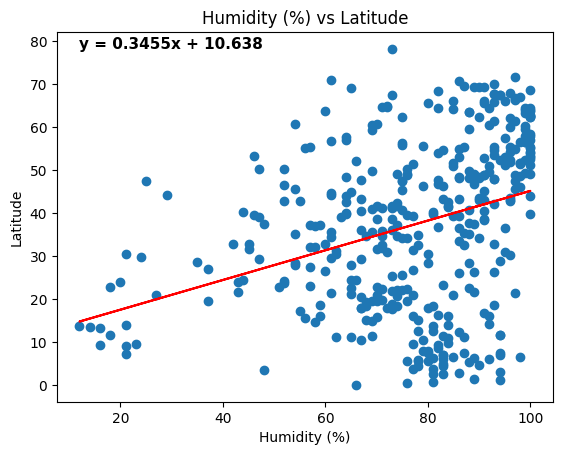

In [17]:
# Northern Hemisphere
x_input = northern_hemi_df["Humidity"]
y_input = northern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Humidity (%)", "Latitude", "TOP", "left")

The r-squared is: 0.42931


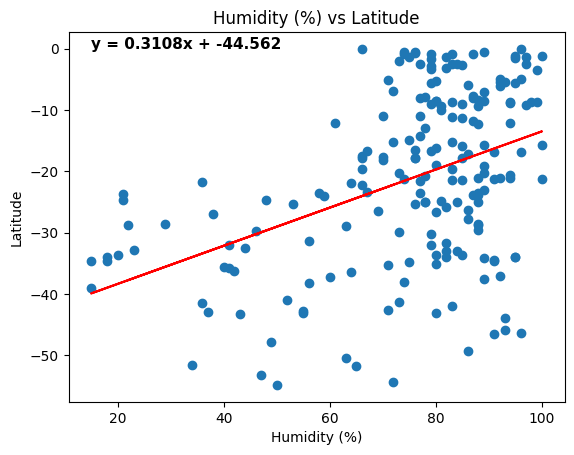

In [18]:
# Southern Hemisphere
x_input = southern_hemi_df["Humidity"]
y_input = southern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Humidity (%)", "Latitude", "TOP", "left")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression is modeling the humidity vs latitude of the cities. The model shows for the northern hemisphere that the further we get from 0, the more humid it tends to be. The southern hemisphere shows the exact opposite. The closer we get to 0, the more humid it is. The r-squared for the north is 0.33683, and the south shows, 0.42931. Since the r-squared are very close, it is hard to decide which is more correct. As previously thought, the southern hemisphere has more rainforest close to the equator, could this be trapping the warmer air, making it more humid but keeping temps lower? Contrarily, the northern hemisphere has more rainforest the further away we get from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2283


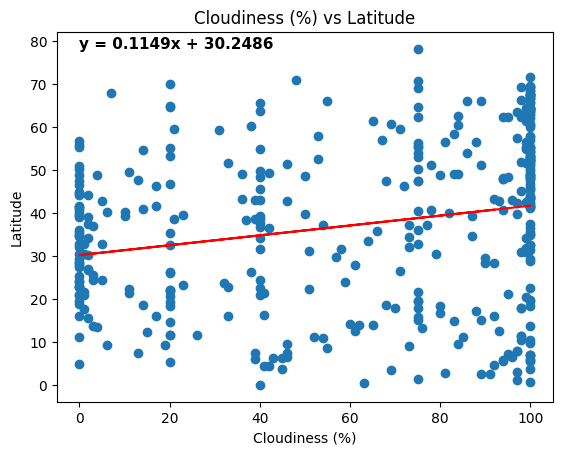

In [19]:
# Northern Hemisphere
x_input = northern_hemi_df["Cloudiness"]
y_input = northern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Cloudiness (%)", "Latitude", "top", "left")

The r-squared is: 0.36554


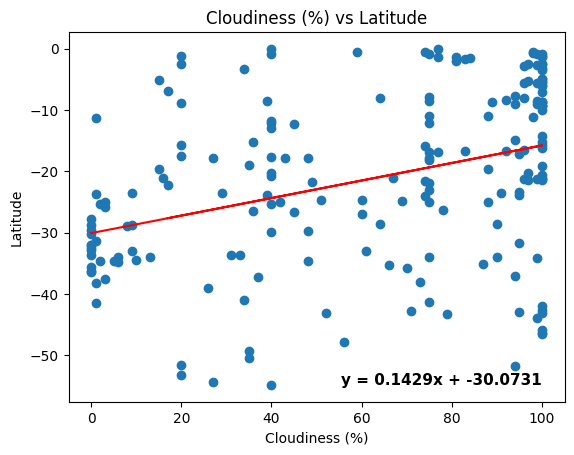

In [23]:
# Southern Hemisphere
x_input = southern_hemi_df["Cloudiness"]
y_input = southern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Cloudiness (%)", "Latitude", "bottom", "right")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression is modeling the cloudiness vs latitude of the cities. There seems to be no determining factor for this model. The northern hemisphere has an r-squared of 0.2283 while the southern hemisphere has an r-squared of 0.36554. Neither one of there is too statistically significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.12558


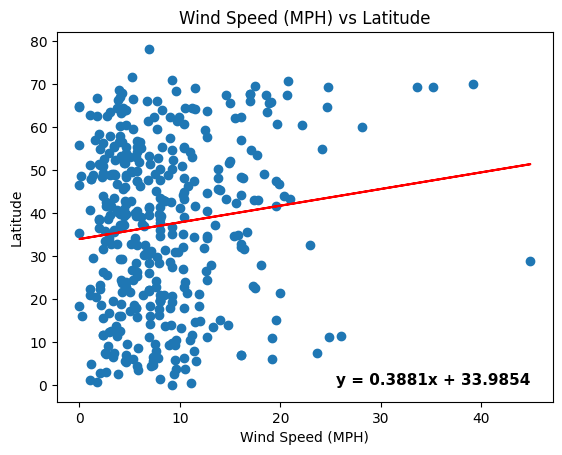

In [21]:
# Northern Hemisphere
x_input = northern_hemi_df["Wind Speed"]
y_input = northern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Wind Speed (MPH)", "Latitude", "bottom", "right")

The r-squared is: -0.34907


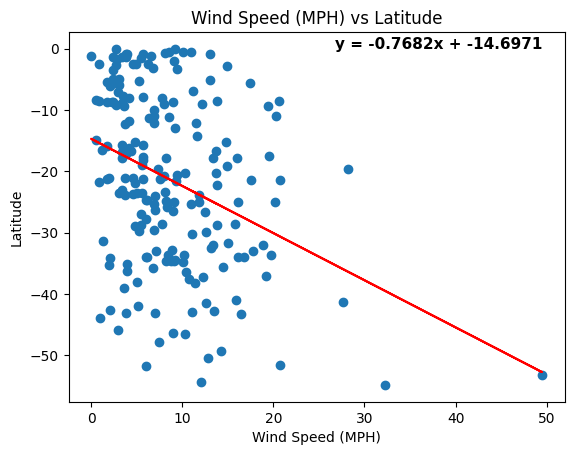

In [22]:
# Southern Hemisphere
x_input = southern_hemi_df["Wind Speed"]
y_input = southern_hemi_df["Lat"]
plot_linear_regression(x_input, y_input, "Wind Speed (MPH)", "Latitude", "top", "right")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression is modeling the wind speed vs latitude of the cities. There seems to be no determining factor for this model. The northern hemisphere has an r-squared of 0.1255 while the southern hemisphere r-squared of -0.34907. Neither one of there is too statistically significant.